Seaborn is graphic library for python. Precisely it is a wrapper module of the library Matplotlib, and all the plotting  functions inside it are exectued using matplotlib functions.

Using seaborn speeds up the creation of more elaborated plots, passing to the function the correct attributes.

We deleagte to seaborn all the dirty job of suplots creation, axes initialization, ecc., and the grouping of data in categories.

In this post we deal with :

    - A stacked dataframe : such datas are tpycally extracted from a database; more featuers are collected in 
    the same colum. In the example we create a dataframe that rappresent weather data, and it will be clearer when we will look at it afterwards.
    
    -  A multiplot : a series of subplots , one for each feature. We create LINES plots.
    
    - Acces to properties and methods to get better and amend the plots.


We use the function sns.relplot() , that is one of the prebuilded function to draw  relational plots 
onto a FacetGrid.

FacetGrid rappresent a Multi-plot grid for plotting conditional relationships.

Other function to draw  plots onto a FacedFrid are :

    - relplot 
    - displot 
    - catplot 
    - lmplot 

***In this example we use https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot.***


First of all we print the version of the used libraries, to allow the right reproduction of the example.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
print("pandas vesrion      : ",pd.__version__)
print("numpy version       : ",np.__version__)
print("matplotlib version  : ",matplotlib.__version__)
print("seaborn version     : ",sns.__version__)


pandas vesrion      :  1.0.3
numpy version       :  1.18.1
matplotlib version  :  3.1.3
seaborn version     :  0.11.0


# Creation of dataframe 

Now we create a dataframe to be uses as example.

Our dataframe represent the wheather data of three cities, max and min temperature and athmoshre pressure.

We randomly generate the values for each day based on the season .

In [3]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from random import gauss

sdate = date(2019,1,1)   # start date
edate = date(2019,12,31)   # end date

dates  = list(pd.date_range(sdate,edate-timedelta(days=1),freq='d'))
cities=['NewYork','Boston', 'Chicago']
sensors=['Pressure','Temperature']

Date=[]
City=[]
Sensor=[]
val_min=[]
val_max=[]
val_mean=[]

# w Winter
min_val_w=lambda k : gauss(0,7) if k=='Temperature' else gauss(1008,5) 
max_val_w =lambda k : gauss(5,7) if  k=='Temperature' else gauss(1010,5)
# sp Spring
min_val_sp=lambda k :  gauss(10,10)  if k=='Temperature' else gauss(1008,5)
max_val_sp =lambda k : gauss(15,7) if  k=='Temperature' else gauss(1010,5)
# s Summer
min_val_s=lambda k : gauss(15,7) if k=='Temperature' else gauss(1008,5)
max_val_s =lambda k : gauss(27,7) if  k=='Temperature' else gauss(1010,5)

# a Autumn
min_val_a=lambda k : gauss(10,7) if k=='Temperature' else gauss(1008,5) 
max_val_a =lambda k : gauss(15,5) if  k=='Temperature' else gauss(1010,5)

for d in dates:
    for c in cities:
        for s in sensors:
            Date.append(d)
            City.append(c)
            Sensor.append(s)
            if d.month in [12,1,2]:
                minim=min_val_w(s)
                maxim=max_val_w(s)
            elif d.month in [3,4,5]:
                minim=min_val_sp(s)
                maxim=max_val_sp(s)
            elif d.month in [6,7,8]:
                minim=min_val_s(s)
                maxim=max_val_s(s)
            elif d.month in [9,10,11]:
                minim=min_val_a(s)
                maxim=max_val_a(s)
                

            val_min.append(minim)
            val_max.append(maxim)
            
       
tab={'date':Date,'city':City,'sensor':Sensor,'min':val_min,'max':val_max}
df=pd.DataFrame(tab)

df.set_index('date',inplace=True)

display(df.head(5))

,city,sensor,min,max
date,,,,
2019-01-01,NewYork,Pressure,1005.283206,1001.217346
2019-01-01,NewYork,Temperature,3.550254,14.199133
2019-01-01,Boston,Pressure,1013.009274,1013.780192
2019-01-01,Boston,Temperature,-9.523732,4.574927
2019-01-01,Chicago,Pressure,1007.199562,1002.637113


# First plot

We plot two graph, one for the minimum temperature for each city and one plot for the minimum pressure for each city. We use the function 

```python

sns.relplot(., kind='line',...)

```

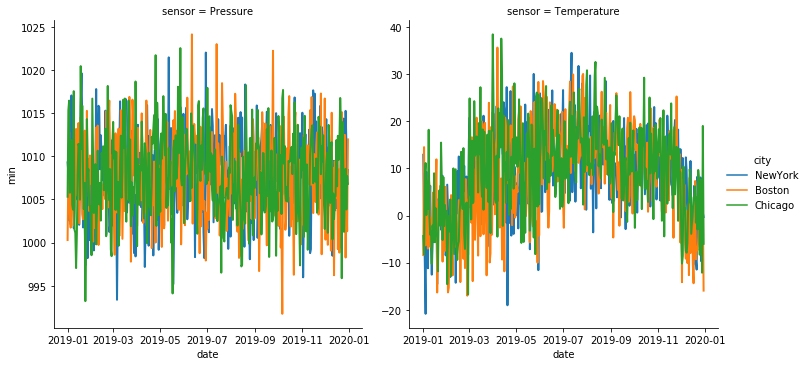

In [106]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,time,timezone
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Per formattare le date nei plots
import matplotlib.dates as mdates

data=df

g=sns.relplot(
    data=data,
    x=data.index, y="min",
     hue='city', col='sensor',
    kind="line",  lw=2,
    facet_kws=dict(sharex=True,sharey=False),
)


The return value g is an instance of the class FacetGrid (FacetGrid  : Multi-plot grid for plotting conditional 
relationships.). . We will see after how acces the plot and modify its properties.

# Improve the data to better plot

To get the plot more readeble we group the data weekly, using groupby.



In [111]:
data=df.groupby([pd.Grouper( freq='10D'),'city','sensor']).mean()
data=pd.DataFrame(data)
data.head(5)

min          max
date       city    sensor                               
2019-01-01 Boston  Pressure     1004.818627  1007.874935
                   Temperature    -0.031437     5.622681
           Chicago Pressure     1008.956239  1009.392487
                   Temperature     2.979502     2.433132
           NewYork Pressure     1006.805699  1009.909408


*** Acces to multilevel index columns ***

Now we must feed our function with data belonging to a multilevel index.
To acces to the multilevel index columns we use :

data.index.get_level_values(..)

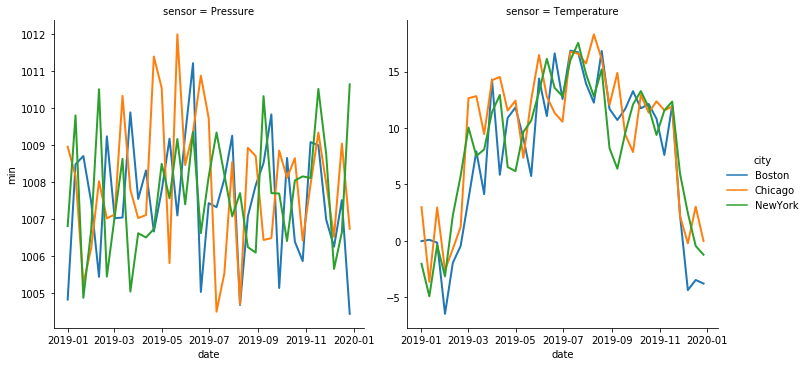

In [102]:
g=sns.relplot(
    data=data,
    x=data.index.get_level_values(0), y="min",
     hue=data.index.get_level_values(1), col=data.index.get_level_values(2),
    kind="line",  lw=2,
    facet_kws=dict(sharex=True,sharey=False),
)

# Access methotds and properties to tweak the plot

As sayed before teh function relplot returns an instance of  seaborn.axisgrid.FacetGrid

In [107]:
g

To acces the single plots we use the property axes, which returns an array of AxesSubplot, each one refered to a subplot of the grid.

A single axes is accesed like this 
```python
ax=g.axes[row][col]
```


In [117]:
print("g.axes \n",g.axes)

ax=g.axes[0][0]
print("\n g.axes[0][0] \n",ax)

g.axes 
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d17ce21d0>

 g.axes[0][0] 
 AxesSubplot(0.0599653,0.0772222;0.387984x0.853889)


So said we can use the usual features of Matplotlib to tweak the plots

'-'

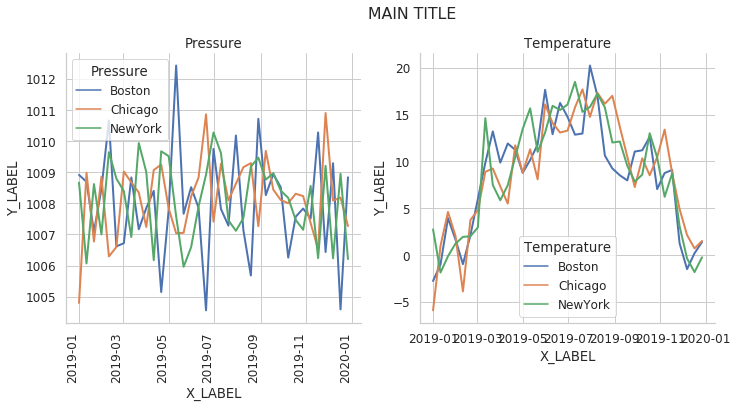

In [51]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
data=df.groupby([pd.Grouper( freq='10D'),'city','sensor']).mean()
data=pd.DataFrame(data)
g=sns.relplot(
    data=data,
    x=data.index.get_level_values(0), y="min",
     hue=data.index.get_level_values(1), col=data.index.get_level_values(2),
    kind="line",  lw=2,
    facet_kws=dict(sharex=True,sharey=False),
)

# Font size of labels and ticks
sns.set(font_scale=1.1)

#Stile grid
sns.set_style('whitegrid')

row=0
ax1=g.axes[row][0]
ax2=g.axes[row][1]

# Rotation of labels of first X axes
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")




# Put the legend on the first plot
ax1.legend()


'''     OPERATIONS ON LEGEND '''
# We take the legend of the first subplot
g.axes[0][0].legend()
legend=g.axes[0][0].legend()
handles, labels = g.axes[0][0].get_legend_handles_labels() # we get the parameters to create same legend in each suplot

# Iteration on each subplot : return name of col (or row if only row is defined) and the matplotlib Axes
for col_val,ax in g.axes_dict.items():    
    ax.legend(handles,labels,title=col_val)
    ax.set_title(col_val)  
    ax.set_xlabel('X_LABEL')
    ax.set_ylabel('Y_LABEL')


''' If row and col are defined in the relplot, the first term is a tuple:
    
    for (row_val, col_val), ax in g.axes_dict.items():
        ax.legend(handles,labels,title=row_val)

'''


# Hide the main legend
g.legend.set_visible(False)

# We add a main TITLE
plt.subplots_adjust(top=0.85)
g.fig.suptitle("MAIN TITLE")

 


'''-'''